In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/sample_data/supply_chain.csv")
print(data)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             99 non-null     float64
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
# Checking missing values
data=data.dropna()
print(data.isnull().sum())


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [ ]:
print(data.describe())

           Price  Availability  Number of products sold  Revenue generated  \
count  99.000000     99.000000                99.000000          99.000000   
mean   49.256951     48.333333               457.545455        5746.897191   
std    31.258639     30.892506               303.356875        2731.078034   
min     1.699976      1.000000                 8.000000        1061.618523   
25%    19.441041     22.500000               181.500000        2797.345557   
50%    51.123870     43.000000               391.000000        5924.682567   
75%    77.433461     75.000000               702.500000        8206.335957   
max    99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count     99.000000   99.000000         99.000000       99.000000   
mean      47.666667   16.050505         48.747475        5.767677   
std       31.511903    8.783535         26.498496        2.732377   
min        0.000000  

In [ ]:
#Scatter Plot

#: The relationship between the price of the products and the revenue generated

import plotly.express as px

fig = px.scatter(data, x='Price', y='Revenue generated', color='Product type',
hover_data=['Number of products sold'],trendline="ols")
fig.show()


In [ ]:
#Pie Chart

#: Company using three carriers of transportation

sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
title='Sales by Product Type',
hover_data=['Number of products sold'],
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

In [ ]:
#Bar Plot

import plotly.graph_objs as go

total_revenue=data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier',
xaxis_title='Shipping Carrier',
yaxis_title='Revenue Generated')
fig.show()

In [ ]:
#Line Plot

revenue_chart = px.line(data, x='SKU',
y='Revenue generated',
title='Revenue Generated by SKU')
revenue_chart.show()

In [ ]:
#Bar Plot

defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()
fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
title='Average Defect Rates by Product Type')
fig.show()

In [ ]:
#Pie Chart

Transportation = px.pie(data,
values='Costs',
names='Transportation modes',
title='Cost Distribution by Transportation Mode',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)
Transportation.show()


In [ ]:
#DATA MANIPULATION

#Average Lead Time vs. Average Manufacturing Lead Time by Product Type.

avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing lead time'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Manufacturing lead time
0    cosmetics          13.538462                13.307692
1     haircare          18.393939                16.696970
2     skincare          18.000000                13.775000


In [ ]:
#RESULTS AND DISCUSSIONS
#Predicting Shipping costs using Linear Regression: Results and Insights.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data['Price'].values.reshape(-1, 1)
y = data['Order quantities'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)
print("Actual values:", y_test)
print("Predicted values:", y_pred)

X_train: [[62.11196546]
 [17.02802792]
 [14.84352328]
 [84.95778682]
 [63.44755919]
 [26.70076097]
 [71.21338908]
 [ 9.81300258]
 [ 4.15630836]
 [30.34147071]
 [90.63545998]
 [79.20993602]
 [87.75543235]
 [59.84156138]
 [91.12831835]
 [19.99817694]
 [64.795435  ]
 [76.96299442]
 [36.98924493]
 [97.76008558]
 [96.34107244]
 [ 8.02285921]
 [14.20348426]
 [ 3.52611126]
 [19.75460487]
 [47.91454182]
 [84.89386898]
 [ 3.03768873]
 [83.85101768]
 [ 6.30688318]
 [97.44694662]
 [52.07593068]
 [17.03493074]
 [95.71213588]
 [80.54142417]
 [26.03486977]
 [63.82839835]
 [16.16039332]
 [ 6.38153316]
 [75.27040698]
 [23.39984475]
 [27.67978089]
 [89.10436729]
 [15.70779568]
 [24.42313142]
 [37.93181238]
 [33.69771721]
 [76.03554443]
 [33.78413803]]
X_test: [[92.55736081]
 [80.41403665]
 [61.16334302]
 [20.98638604]
 [69.10879955]
 [69.290831  ]
 [81.46253437]
 [ 3.17001141]
 [79.85505834]
 [77.90392722]
 [31.14624316]
 [47.71423308]
 [57.05703122]
 [99.17132864]
 [68.71759675]
 [50.84739305]
 [ 4.32

In [ ]:
#Logistic regression model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the threshold value
threshold = 0.5  # You can adjust this value based on your needs

# Assuming 'data' is your DataFrame
data['Defect rates'] = (data['Defect rates'] > threshold).astype(int)

# Rest of your code
X = data[["Order quantities"]]
y = data["Defect rates"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Actual Values (y_test):")
print(y_test.values)
print("Predicted Values (y_pred):")
print(y_pred)


Actual Values (y_test):
[1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Predicted Values (y_pred):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[ 0  4]
 [ 0 26]]


Accuracy: 0.87
Precision: 0.87
Recall: 1.00


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

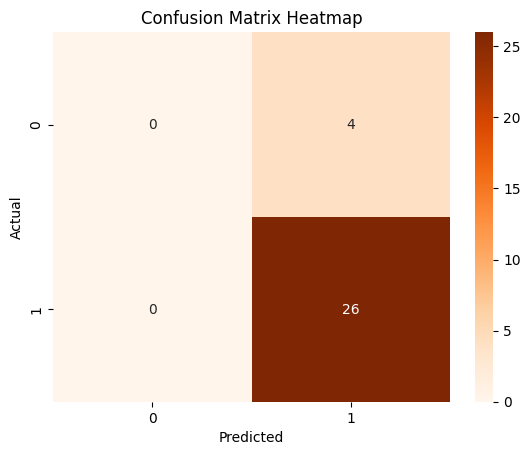

In [ ]:
#HeatMap confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.87      1.00      0.93        26

    accuracy                           0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



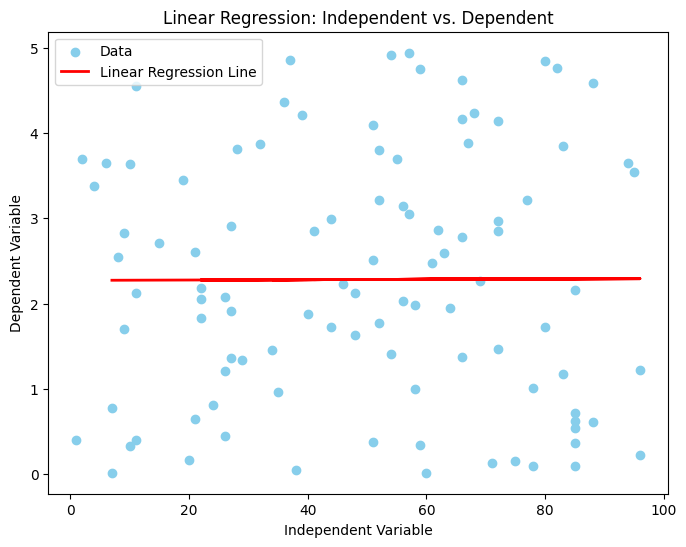

Model Coefficients:
Intercept: 2.272115370252121
Coefficient: 0.00020912202759418636

Mean Squared Error (MSE): 1.099281939395658
R-squared (R2): 0.0005841976799848547


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data=pd.read_csv("/content/sample_data/supply_chain.csv")

# Step 1: Explore and preprocess your dataset if needed

# Step 2: Define the variables for the analysis
# Choose the independent and dependent variables you want to analyze
X_independent = data[['Order quantities']]  # Independent variable (feature)
y_dependent = data['Defect rates']  # Dependent variable (target)

# Step 3: Split the data into training and testing sets (if needed)
X_train, X_test, y_train, y_test = train_test_split(X_independent, y_dependent, test_size=0.2, random_state=42)

# Step 4: Create a linear regression model and fit it to the data
supply_chain_model = LinearRegression()
supply_chain_model.fit(X_train, y_train)

# Step 5: Make predictions for the dependent variable
y_pred = supply_chain_model.predict(X_test)

# Step 6: Visualize the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_independent, y_dependent, color='skyblue', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.title('Linear Regression: Independent vs. Dependent')
plt.show()

# Step 7: Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print model coefficients, MSE, and R2
print("Model Coefficients:")
print("Intercept:", supply_chain_model.intercept_)
print("Coefficient:", supply_chain_model.coef_[0])
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
